In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

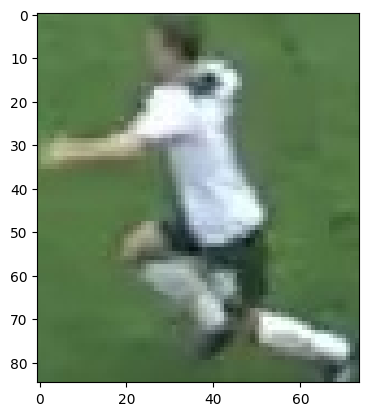

In [4]:
image = cv2.cvtColor(cv2.imread("../output-videos/cropped_img.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

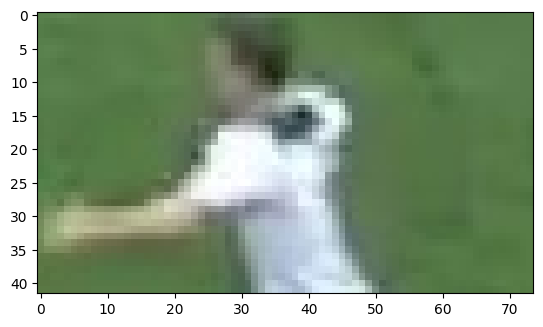

In [6]:
# take top-half of img
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

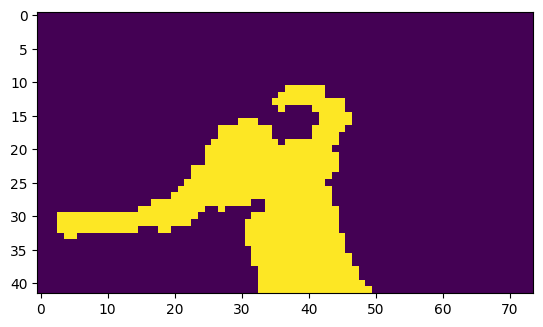

In [7]:
# cluster img into two clusters: bg, shirt colour
# perform k-means clustering w/ 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(top_half_image.reshape(-1, 3))

# get cluster labels and reshape labels into orginal image shape
clustered_image = kmeans.labels_.reshape(top_half_image.shape[0], top_half_image.shape[1])

# display the clustered image
plt.imshow(clustered_image)
plt.show()

In [8]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
kmeans.cluster_centers_[1 - non_player_cluster]

array([198.05947955, 209.11895911, 210.6598513 ])